<a href="https://colab.research.google.com/github/venssss/TUGAS_UTS_AVD-MUHAMMADAKBAR/blob/main/TUGAS_AVD_UTS_MUHAMMAD_AKKBAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation menggunakan K-Means Clustering**

**Langkah 1: Import Library**

Mengimpor library yang dibutuhkan untuk analisis data dan visualisasi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Langkah 2: Load Dataset**

Dataset ini diperoleh dari Kaggle, kemudian diupload ke Google Colab dataset "marketing_campaign.csv"

In [ ]:
from google.colab import files
uploaded = files.upload()

# Setelah itu, load dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

Saving marketing_campaign.csv to marketing_campaign (1).csv


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**Langkah 3: Eksplorasi dan Pembersihan Data**

Melihat struktur data, menghapus kolom yang tidak relevan, dan mengatasi missing values.

In [ ]:
df.info()
df.isnull().sum()

# Drop kolom yang tidak kita butuhkan
df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Drop missing values
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Langkah 4: Ubah Kategori ke Numerik (Opsional)**

Beberapa kolom seperti marital status dan pendidikan diubah ke numerik agar bisa diproses oleh K-Means.

In [ ]:
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes
df['Education'] = df['Education'].astype('category').cat.codes

**Langkah 5: Normalisasi Data**

K-Means sensitif terhadap skala data, jadi perlu menstandarkan semua nilai numerik.


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

**Langkah 6: Menentukan Jumlah Cluster dengan Elbow Method**

Elbow method membantu menentukan jumlah cluster optimal dengan melihat total inertia (WCSS).


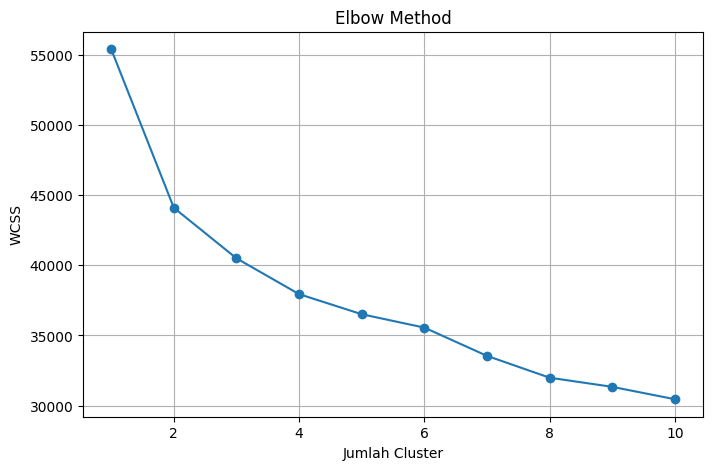

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Berdasarkan hasil Elbow Method, terlihat bahwa penurunan WCSS cukup signifikan hingga jumlah cluster ke-4. Setelah itu, penurunannya mulai melandai. Oleh karena itu, dipilih jumlah cluster sebanyak **4** sebagai jumlah yang optimal untuk analisis ini.


**Langkah 7: Buat dan Terapkan Model K-Means**

Dari hasil Elbow Method, Dipilih 4 cluster.


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df['Cluster'].value_counts()

,count
Cluster,
0,995
3,606
1,446
2,169


**Langkah 8: Visualisasi dan Analisis Cluster**

Meihat karakteristik tiap cluster untuk memahami perbedaannya.

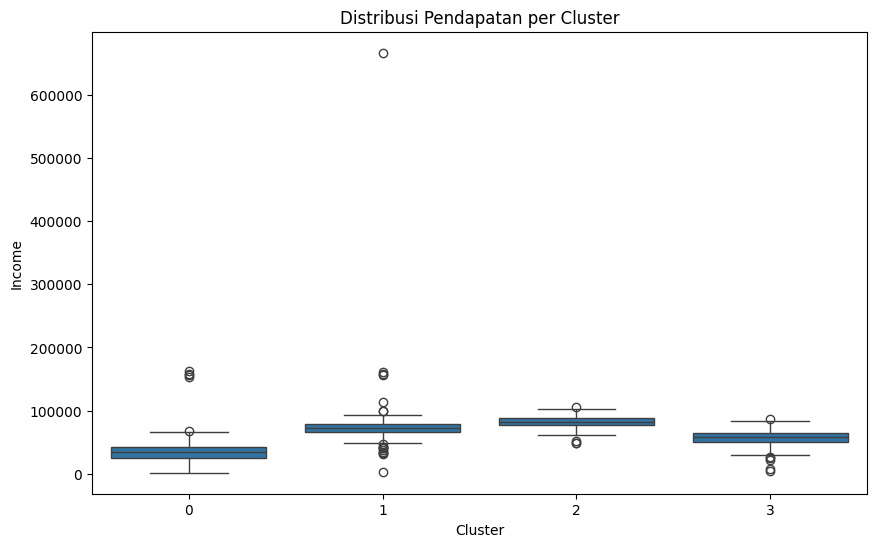

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='Income', data=df)
plt.title('Distribusi Pendapatan per Cluster')
plt.show()

**Langkah 9: Interpretasi Hasil**

Menjelaskan isi tiap cluster berdasarkan nilai rata-rata atau distribusi datanya.


In [ ]:
df.groupby('Cluster').mean()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1971.842211,2.246231,3.723618,34263.206030,0.808040,0.427136,49.004020,38.042211,4.922613,22.454271,...,0.519598,3.152764,6.508543,0.074372,0.005025,0.000000,0.000000,0.002010,0.013065,0.093467
1,1967.831839,2.298206,3.798206,74182.829596,0.047085,0.228700,49.154709,492.473094,72.336323,430.127803,...,5.798206,8.410314,2.946188,0.060538,0.024664,0.000000,0.109865,0.000000,0.006726,0.170404
2,1969.396450,2.514793,3.733728,81926.739645,0.053254,0.130178,49.568047,876.810651,55.532544,469.053254,...,6.059172,8.218935,3.011834,0.142012,0.390533,0.946746,0.443787,0.124260,0.005917,0.579882
3,1964.425743,2.673267,3.674917,57354.551155,0.239274,0.942244,48.767327,446.216172,19.570957,126.425743,...,2.957096,7.554455,5.755776,0.062706,0.135314,0.003300,0.029703,0.011551,0.006601,0.108911


__________________________________________________________________________________________

**Rekomendasi Strategi berdasarkan Segmentasi Pelanggan**



**Cluster 0 – Low Income, Low Engagement**

1.   Karakteristik:

*   Rata-rata pendapatan terendah (34K)
*   Tinggal dengan anak (Kidhome & Teenhome tinggi)
*   Pembelian semua produk sangat rendah (Wine, Fruits, Meat)
*   Kunjungan ke web tinggi, tapi sedikit yang beli
*   Sangat sedikit menerima campaign (response rendah)

2.   Strategi:

*   Fokus edukasi dan promosi yang menarik perhatian (harga diskon,   bundling hemat)
*   Gunakan campaign digital berbasis web karena mereka aktif di web
*   Tawarkan loyalty point untuk setiap pembelian pertama agar mereka mulai belanja


**Cluster 1 – Mid Income, Aktif Belanja Offline**

1.  Karakteristik:

*   Pendapatan menengah ke atas (74K)
*   Sering beli di store dan katalog (store & catalog purchase tinggi)
*   Pembelian produk cukup merata, terutama buah & daging
*   Sedikit sekali respons terhadap campaign

2.  Strategi:

*   Fokus pada store experience dan katalog (penawaran eksklusif via katalog)
*   Bangun program loyalti offline (member card, diskon setelah jumlah belanja tertentu)
*   Campaign tidak perlu terlalu agresif, lebih baik lewat media fisik atau personalisasi katalog


**Cluster 2 – High Income, Highly Engaged, Campaign Loyal**

1.  Karakteristik:

*   Pendapatan tertinggi (81K)
*   Pembelian paling tinggi di hampir semua kategori produk
*   Respon kampanye tertinggi (AcceptedCmp1–5 & Response sangat tinggi)
*   Tidak punya banyak anak, cenderung lebih bebas keuangan

2.  Strategi:

*   Fokuskan semua campaign ke mereka (email marketing, membership premium, promo eksklusif)
*   Tawarkan produk baru, paket langganan, atau akses awal ke diskon
*   Jadikan mereka sebagai “influencer pelanggan” → bisa beri review atau share produk ke orang lain


**Cluster 3 – Average Income, Moderate Buyer**

1.  Karakteristik:

*   Pendapatan sekitar 57K
*   Belanja cukup aktif, tapi tidak setinggi Cluster 2
*   Respon kampanye moderat
*   Kunjungan web dan pembelian di toko relatif stabil

2.  Strategi:

*   Dorong peningkatan pembelian dengan upsell & cross-sell (contoh: beli wine + daging = diskon)
*   Campaign ringan dengan hadiah langsung atau voucher
*   Tawarkan promo repeat purchase untuk meningkatkan loyalitas